# **Projeto Final - Eletromagnetismo e Ondulatória** #

Alunos:
- Davi Reis Vieira de Souza
- Francisco Pinheiro Janela
- Nicolas Maciel Queiroga

<div>
    <img src="foto1.png" align="center" width="800"/>
</div>

## Etapa 1 - Atividades

### Elaboração do diagrama do modelo eletrodinâmico do circuito WPT

Essa atividade consiste em especificar, por meio de um circuito, o modelo eletrodinâmico WPT usando abordagem fasorial. Para isso, o modelo eletrodinâmico do transformador deve ser adaptado de modo a considerar o parâmetro 𝑘 e os capacitores $C1$ e $C2$, lembrando que $C1$ deve estar em série com a bobina primária, e $C2$ em paralelo
com a secundária; no projeto, vamos considerar que as bobinas transmissora e receptora sejam iguais, ou seja, $L1$ = $L2$. Do mesmo modo, os capacitores também devem ser iguais ($C1$ = $C2$), de modo que a frequência de ressonância dos conjuntos $LC$ seja a mesma no primário e secundário. Pesquise sobre como calcular a frequência de ressonância de um conjunto $LC$

Abaixo, foi realizada a esquematização de como será feito o circuito WPT de nosso projeto:

<div>
    <img src="eletromag_circuito.png" align="center" width="800"/>
</div>

### Código do modelo numérico

#### Importando bibliotecas necessárias

In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.kernel_regression import KernelReg

from __future__ import print_function
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

#### Definindo e criando funções que serão utilizadas no projeto

Abaixo, foram criadas duas funções:

`calculaCorrenteTransformadores`

Esta função calcula as correntes $I_1$ e $I_2$ do circuito.

`frequenciaDeRessonancia`

Esta será responsável pelo cálculo da Frequência de Ressonância a partir da equação abaixo:

\begin{equation}Fr=\frac{1}{2{\pi}\sqrt{LC}}\end{equation}

In [11]:
def calculaCorrenteTransformadores(V1, r1, l1, r2, l2, rc, k, f, c=[None]):
    """
    Recebe V1, r1, l1, r2, l2, rc, k, f, c=[None]
    Retorna I[0], I[1]
    """
    w = 2*pi*f
    m = k*sqrt(l1*l2)
    
    XR1 = r1
    XL1 = 1j*w*l1
    
    XR2 = r2
    XL2 = 1j*w*l2
    
    XRc = rc
    
    XM = 1j*w*m
    
    if None in c:
        Zeq1 = XR1 + XL1
        Zeq2 = XL2 + XR2 + XRc
        Z = np.array([[Zeq1, -XM], 
                     [-XM, Zeq2]])
    else:    
        XC1 = 1/(1j*w*c[0])
        XC2 = 1/(1j*w*c[1])
        Zeq1 = XR1 + XL1 + XC1
        Zeq3 = (XRc * XC2)/(XRc + XC2)
        Zeq2 = ((XL2 + XR2) * Zeq3)/(XL2 + XR2 + Zeq3)
        Z = np.array([[Zeq1, -XM], 
                      [-XM, Zeq2]])
        
    V = np.array([V1, 0])
    I = np.dot(linalg.inv(Z), V)
    return I[0],I[1]

def frequenciaDeResonancia(l,c):
    """
    Recebe l, c
    Retorna f#### Definindo e criando funções que serão utilizadas no projeto
    """
    return 1/(2*pi*sqrt(l*c))

#### Definindo variáveis que serão utilizadas (Já atualizadas na Etapa 2)

Pelo fato de o gerador de sinais não ter potência suficiente para alimentar a bobina primária do WPT, vamos precisar trabalhar com um circuito denominado “meia ponte” (ou half bridge), capaz de isolar a excitação na frequência de ressonância (circuito de controle), proveniente do gerador de sinais, da alimentação da bobina primária (circuito de potência). Observe o circuito que vamos montar na figura a seguir. Na entrada do circuito (pino 2 do IR2302) conectaremos o gerador de sinais ou o Arduíno, que deve fornecer um sinal de onda quadrada na frequência de ressonância (entre 0 𝑉 e 𝑉𝑐𝑐). O circuito integrado IR2302 controla o acionamento das chaves eletrônicas (MOSFETs), acionando-as alternadamente nos semiciclos nulo e positivo do sinal quadrado. Na montagem do circuito, é fundamental verificar o sinal de onda quadrada nos pontos de entrada e saída com o auxílio de um osciloscópio (esse sinal deve ir de 0 𝑉 a 𝑉𝑐𝑐, sendo 𝑉𝑐𝑐 máximo igual a 15 𝑉). Perguntem aos professores e aos técnicos do LFI sobre o funcionamento desse circuito, não deixando de fazer anotações sobre ele, principalmente compreendo por que não é possível conectar o Arduíno ou o gerador de sinais diretamente à bobina primária.

<div>
    <img src="quadro_alimentacao.png" align="center" width="800"/>
</div>

OBS: Foi realizada a correção de $V_1$ após a construção do circuito experimental uma vez que estamos utilizando uma tensão quadrada na entrada da bobina primária. A seguinte equação foi utilizada:

\begin{equation}V_1(t)=\frac{2}{{\pi}}V_p{\cos(wt)}\end{equation}

Sendo $V_p$ a amplitude da onda quadrada (alimentação dos MOSFETs).

Foi escolhida uma amplitude de entrava de 14.9V.

In [12]:
VP = 14.9 # Amplitude da onda quadrada
V1 = (2/pi)*VP # V1 [V]
r1 = 225.3e-3 # R1 [Ohms]
r2 = 210.9e-3 # R2 [Ohms]
rc = 220/3 # RC [Ohms]
l1 = 0.7730e-3 # L1 [H]
l2 = 0.7648e-3 # L2 [H]
c1 = 4.7e-6 # C1 [F]
c2 = 4.7e-6 # C2 [F]
c = [c1, c2]
k = 0.1 # K [Valor adimensional]

#### Cálculo da Frequência de ressonância a partir dos valores do circuito

In [13]:
nf1 = frequenciaDeResonancia(l2,c[0])
print(f'\nFrequência de ressonância = {abs(nf1):.2f}Hz')


Frequência de ressonância = 2654.59Hz


A partir da frequência de ressonância calculada, com base nos capacitores e resistores escolhidos, plotou-se um gráfico para análise da variação de $V_2$ e $P_2$ com valores de $k$.

V1 = 9.485634608276962V, R1 = 0.2253 Ohms, L1 = 0.000773H, R2 = 0.2109 Ohms, L2 = 0.0007648H, RC = 73.33333333333333 Ohms, f = 2654.59Hz


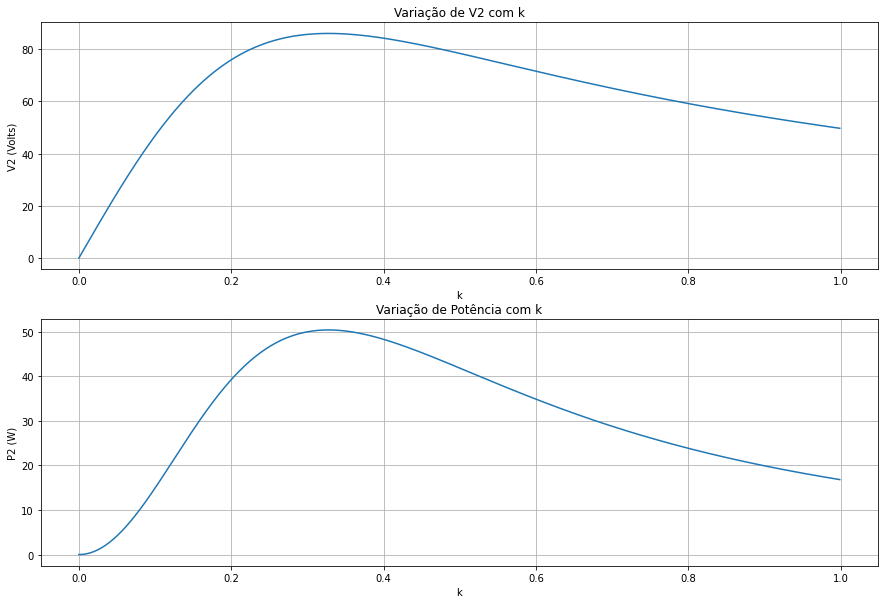

In [14]:
ks = np.arange(0, 1, 1e-3)
fs = np.arange(1, 20000, 10)

listav2 = []
listap2 = []

for k in ks:
    i1, i2 = calculaCorrenteTransformadores(V1, r1, l1, r2, l2, rc, k, nf1, c)
    v2Pico = i2*rc
    listav2.append(abs(v2Pico))
    v2Eficaz = v2Pico/sqrt(2)
    iefConjugado = (i2.conjugate())/sqrt(2)
    P2 = v2Eficaz*iefConjugado
    listap2.append(abs(P2))

print(f'V1 = {V1}V, R1 = {r1} Ohms, L1 = {l1}H, R2 = {r2} Ohms, L2 = {l2}H, RC = {rc} Ohms, f = {abs(nf1):.2f}Hz')

    
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(ks, listav2)
plt.title('Variação de V2 com k')
plt.xlabel('k')
plt.ylabel('V2 (Volts)')
plt.grid(True)

plt.subplot(212)
plt.plot(ks, listap2)
plt.title('Variação de Potência com k')
plt.xlabel('k')
plt.ylabel('P2 (W)')
plt.grid(True)

plt.show()

Além disso, plotou-se um gráfico dos valores de $V_2$ pela Frequência de ressonância escolhida para obter-se valores alvo na hora da construção do sistema.

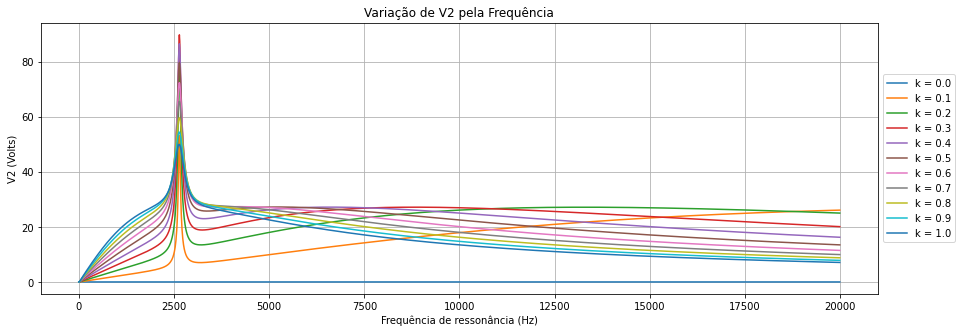

In [15]:
plt.figure(figsize=(15, 5))

ks = np.arange(0, 1.1, 0.1)

for kPerFreq in ks:
    listav2Ks = []
    for freq in fs:
        i1, i2 = calculaCorrenteTransformadores(V1, r1, l1, r2, l2, rc, kPerFreq, freq, c)
        v2PicoPerFreq = i2*rc
        listav2Ks.append(abs(v2PicoPerFreq))
    plt.plot(fs, listav2Ks, label=f'k = {kPerFreq:.1f}')
    
plt.title("Variação de V2 pela Frequência")
plt.xlabel("Frequência de ressonância (Hz)")
plt.ylabel("V2 (Volts)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
    
plt.show()

Ainda, um gráfico de Potência por Frequência foi feito para análise dos possíveis valores que podem ser alcançados teoricamente.

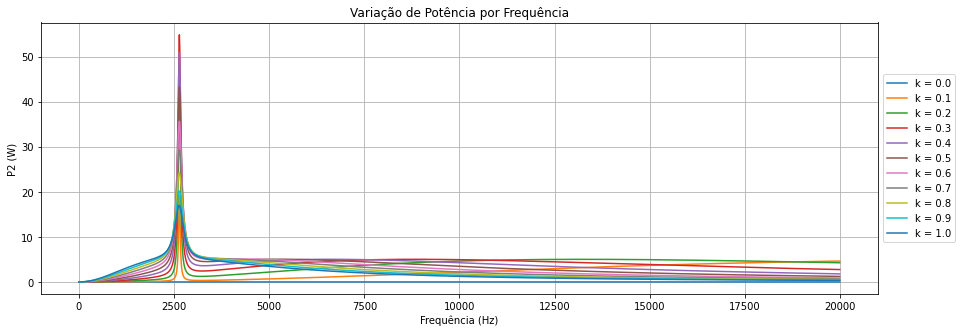

In [16]:
ks = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(15, 5))

for k in ks:
    listap2PerK = []
    for freq in fs:
        i1, i2 = calculaCorrenteTransformadores(V1, r1, l1, r2, l2, rc, k, freq, c)
        v2Pico = i2*rc
        v2Eficaz = v2Pico/sqrt(2)
        iefConjugado = (i2.conjugate())/sqrt(2)
        P2 = v2Eficaz*iefConjugado
        listap2PerK.append(abs(P2))
    plt.plot(fs, listap2PerK, label=f'k = {k:.1f}')
    
plt.title("Variação de Potência por Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("P2 (W)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
    
plt.show()

Foi realizado, ainda, um plot interativo para obervação do comportamento de $V_2$, em Volts, e a Potência Dissipada $P_2$, em Watts, conforme a variação dos capacitores e o valor de $R_c$.

In [17]:
def func_gen(cValue, rc):
    cValue*=1e-6
    cValue = [cValue, cValue]

    ks = np.arange(0, 1, 1e-3)

    listav2Din = []
    listap2Din = []

    for k in ks:
        i1, i2 = calculaCorrenteTransformadores(V1, r1, l1, r2, l2, rc, k, nf1, cValue)
        v2Pico = i2*rc
        listav2Din.append(abs(v2Pico))
        v2Eficaz = v2Pico/sqrt(2)
        iefConjugado = (i2.conjugate())/sqrt(2)
        P2 = v2Eficaz*iefConjugado
        listap2Din.append(abs(P2))

    print(f'V1 = {V1}V,\nR1 = {r1} Ohms, L1 = {l1}H,\nR2 = {r2} Ohms, L2 = {l2}H,\nRC = {rc} Ohms,\nFrequência de ressonância = {abs(nf1):.2f}Hz')

        
    plt.figure(figsize=(15, 10))
    plt.subplot(211)
    plt.plot(ks, listav2Din)
    plt.title('Variação de V2 com k')
    plt.xlabel('k')
    plt.ylabel('V2 (Volts)')
    plt.grid(True)

    plt.subplot(212)
    plt.plot(ks, listap2Din)
    plt.title('Variação de Potência com k')
    plt.xlabel('k')
    plt.ylabel('P2 (W)')
    plt.grid(True)

    plt.show()

    
def sliderMake(val):
    return widgets.FloatSlider(
    value=val[0],
    min=val[1],
    max=val[2],
    step=val[3],
    description=val[4],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format=val[5])

p = interactive(func_gen, 
                cValue=sliderMake((4.7,0.01,5,0.01,'Capacitância (microF): ','.4f')),
                rc=sliderMake((rc,5,100,0.1,'RC: ','.2f')))
display(p)

interactive(children=(FloatSlider(value=4.7, continuous_update=False, description='Capacitância (microF): ', m…

## Etapa 2 - Medições

### Análise dos dados experimentais

Nesta etapa, serão levantados os valores medidos experimentalmente e suas respectivas análises para, ao fim, verificar a eficiência do modelo desenvolvido ao longo do projeto.

Inicialmente, montou-se o circuito 1:

<div>
    <img src="foto5.png" align="center" width="540"/>
</div>

Ao se unir o circuito com a bobina, o circuito 1 ficou assim:

<div>
    <img src="foto6.png" align="center" width="540"/>
</div>

Além disso, foi montado o circuito impresso para o circuito 2 abaixo com os capacitores e resistores escolhidos já listados acima.

<div>
    <img src="foto2.png" align="center" width="540"/>
</div>

A montagem do circuito 2 ficou da seguinte forma:
<div>
    <img src="foto4.png" align="center" width="540"/>
</div>

#### Importando os valores reais

In [18]:
dados_experimentais = pd.read_excel('WPT.xlsx')
dados_experimentais.head()

,Amplitude Máxima (V),Distância de transmissão (cm)
0,22.5,14.0
1,23.2,15.5
2,23.3,17.5
3,24.1,20.5
4,24.1,22.0


#### Cálculo da Potência real medida

\begin{equation}Preal=\frac{(V_2/\sqrt2)^2}{R_c}\end{equation}


In [19]:
dados_experimentais['Potência real medida (W)'] = ((dados_experimentais['Amplitude Máxima (V)']**2)/2)/rc
dados_experimentais.head()

,Amplitude Máxima (V),Distância de transmissão (cm),Potência real medida (W)
0,22.5,14.0,3.451705
1,23.2,15.5,3.669818
2,23.3,17.5,3.701523
3,24.1,20.5,3.960068
4,24.1,22.0,3.960068


#### Plote do gráfico de Potência Efetiva vs Distância

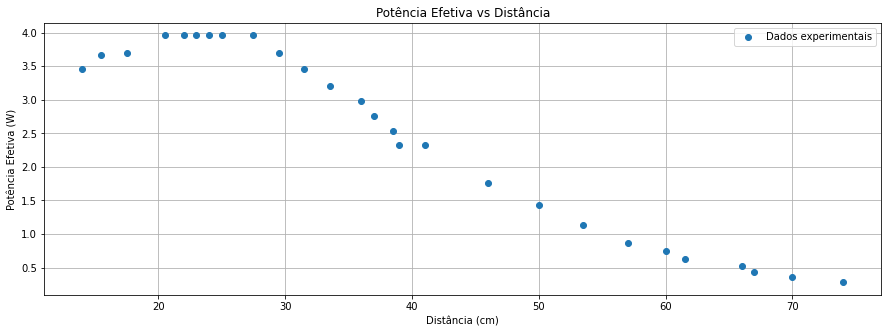

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(dados_experimentais['Distância de transmissão (cm)'],dados_experimentais['Potência real medida (W)'], 'o', label='Dados experimentais')

plt.title('Potência Efetiva vs Distância')
plt.xlabel('Distância (cm)')
plt.ylabel('Potência Efetiva (W)')
plt.grid(True)
plt.legend()
plt.show()

#### Criando a coluna de Potência Efetiva * Distância

Este dado será utilizado como paraâmetro para análise da efetividade do sistema.

In [21]:
dados_experimentais['Potência Efetiva x Distância'] = dados_experimentais['Potência real medida (W)']*dados_experimentais['Distância de transmissão (cm)']
dados_experimentais.head()

,Amplitude Máxima (V),Distância de transmissão (cm),Potência real medida (W),Potência Efetiva x Distância
0,22.5,14.0,3.451705,48.323864
1,23.2,15.5,3.669818,56.882182
2,23.3,17.5,3.701523,64.776648
3,24.1,20.5,3.960068,81.181398
4,24.1,22.0,3.960068,87.121500


#### Gerando os gráfico para análise do sistema

Além do plot dos valores observados experimentalmente, foi realizada uma regressão para analisar o sistema. Abaixo, pode-se observar, no gráfico, a curva de tendência do sistema.

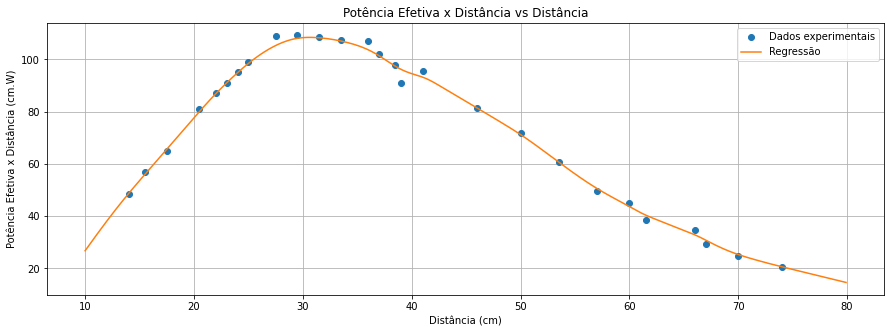

In [22]:
voltagem = dados_experimentais['Amplitude Máxima (V)']
distancia = dados_experimentais['Distância de transmissão (cm)']
potencia_distancia = dados_experimentais['Potência Efetiva x Distância']

kr = KernelReg(potencia_distancia,distancia,'c')
distance = np.arange(10,80,0.1)
y_pred, y_std = kr.fit(distance)

plt.figure(figsize=(15, 5))
plt.plot(distancia,potencia_distancia, 'o', label='Dados experimentais')
plt.plot(distance, y_pred, '-', label='Regressão')

plt.title('Potência Efetiva x Distância vs Distância')
plt.xlabel('Distância (cm)')
plt.ylabel('Potência Efetiva x Distância (cm.W)')
plt.grid(True)
plt.legend()
plt.show()

### Resultados Finais

In [23]:
print(f"""
Dados experimentais (Vp de 14.9V):

Potência Efetiva x Distância máxima = {potencia_distancia.max():.2f} cm.W
Distância: {distancia[np.argmax(potencia_distancia)]:.2f} cm
Voltagem V2: {voltagem[np.argmax(potencia_distancia)]:.2f} V
Potência equivalente: {(potencia_distancia.max())/distancia[np.argmax(potencia_distancia)]:.2f} W""")


Dados experimentais (Vp de 14.9V):

Potência Efetiva x Distância máxima = 109.19 cm.W
Distância: 29.50 cm
Voltagem V2: 23.30 V
Potência equivalente: 3.70 W


Comparando estes dados com os valores teóricos, pode-se afirmar que há coerência nos cálculos realizados, mas também o quanto os parâmetros experimentais influenciam no experimento.